In [2]:
import matplotlib.pyplot as plt

import numpy as np

def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel, fontsize=18)
    if xlabel:
        plt.xlabel(xlabel, fontsize=18)
        
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    
    if axes:
        total_t = tmax=tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k', linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0], [xmin,xmax], c='k', linewidth=1)
        plt.ylim(xmin,xmax)
        
        
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

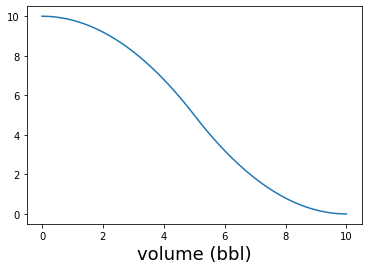

In [27]:

def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

def ave_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2- t1)


def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2
    
plot_volume(decreasing_volume,0,10)


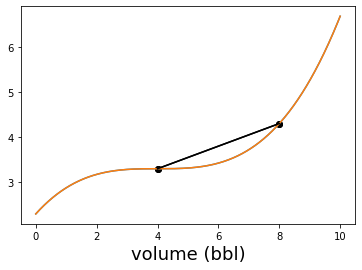

In [28]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

plot_volume(volume,0,10)
plot_secant(volume,4,8)

plot_volume(volume,0,10)
plot_secant(volume,4,8)

In [ ]:
# Plotting ave flow rate over time

In [31]:
import numpy as np
np.arange(0,10,0.5)


def interval_flow_rates(v,t1,t2,dt):
    return [(t, ave_flow_rate(v,t,t+dt))
                for t in np.arange(t1,t2,dt)]

In [32]:
interval_flow_rates(volume, 0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

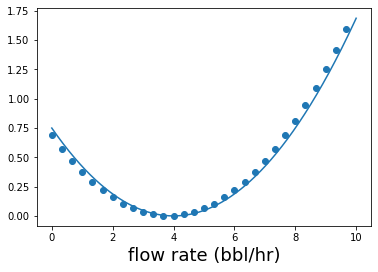

In [33]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)
    
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)

In [34]:
# Approximation instantaneous flow rate # or as per calculus term derivivative
 

In [35]:
def instantaneous_flow_rate(v, t, digits=6):
    tolarance = 10 ** (-digits)
    h = 1
    approx = ave_flow_rate(v,t-h,t+h)
    for i in range(0,2*digits):
        h = h / 10
        next_approx = ave_flow_rate(v,t-h,t+h)
        if abs(next_approx - approx) < tolarance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

In [36]:
instantaneous_flow_rate(volume,1)

0.421875

def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume,t)
    return flow_rate_function

In [37]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume,t)
    return flow_rate_function

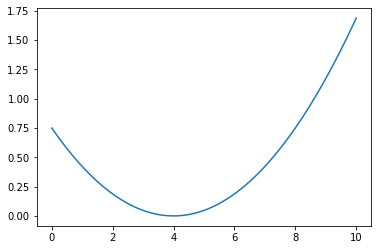

In [38]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

In [41]:
def small_volume_change(q,t,dt):
    return q(t) * dt

display(small_volume_change(flow_rate,2,1))

def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
               for t in np.arange(t1,t2,dt))
    
display(volume_change(flow_rate,0,10,0.1))


def approximate_volume(q, v0, dt, T):
        return v0 + volume_change(q, 0, T,dt)



0.1875

4.32890625

In [44]:
def approximate_volume_function(q,v0,dt):
    def volume_function(T):
        return approximate_volume(q,v0,dt,T)
    return volume_function

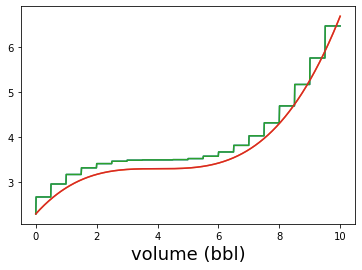

In [45]:
plot_volume(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_volume(volume,0,10)

plot_volume(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_volume(volume,0,10)

In [46]:
def get_volume_function(q,v0,digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q,0,T,dt)
        for i in range(0,digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q,0,T,dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

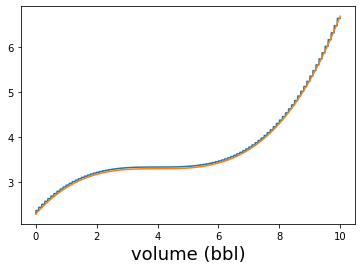

In [47]:
plot_volume(approximate_volume_function(flow_rate,2.3,0.1),0,10)
plot_volume(volume,0,10)

In [48]:
v = get_volume_function(flow_rate,2.3,digits=6)

v(1)

2.878125